<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [8]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [46]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [52]:
import scipy

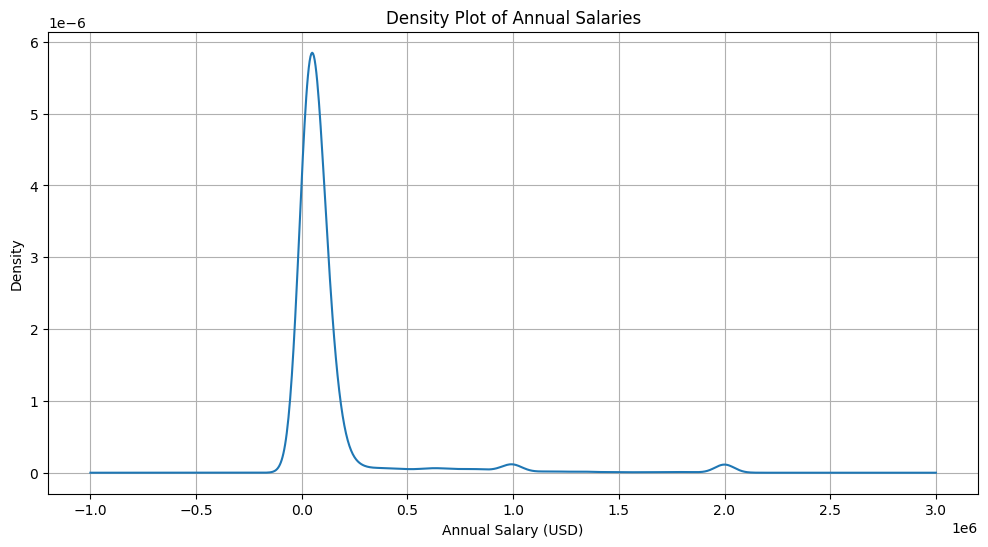

In [53]:
# your code goes here
import matplotlib.pyplot as plt
data = df['ConvertedComp'].dropna()

plt.figure(figsize=(12, 6))
data.plot(kind='kde')
plt.title('Density Plot of Annual Salaries')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


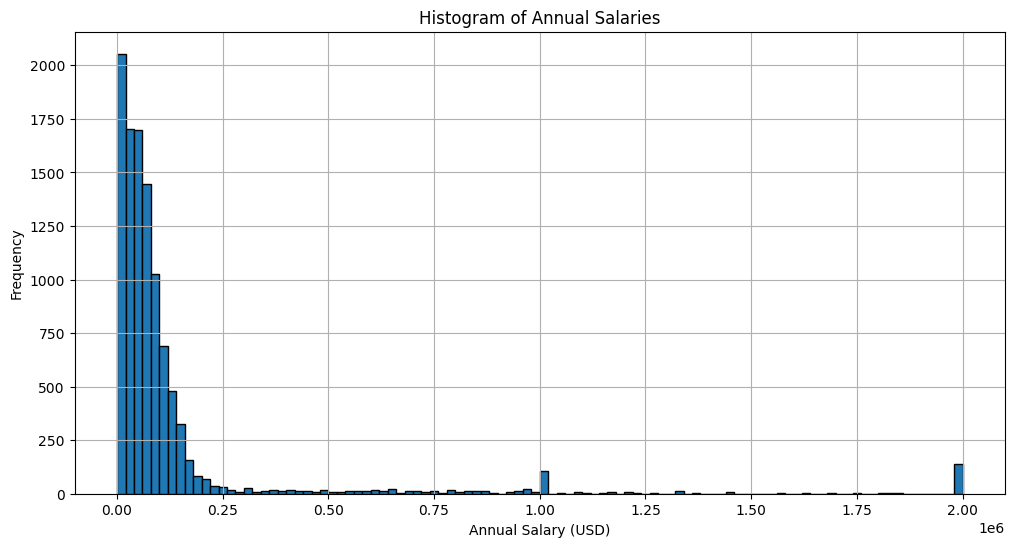

In [56]:
# your code goes here
plt.figure(figsize=(12, 6))
plt.hist(data, bins=100, edgecolor='black')
plt.title('Histogram of Annual Salaries')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [58]:
# your code goes here
median = data.median()
print(median)

57745.0


How many responders identified themselves only as a **Man**?


In [63]:
# your code goes here
Gender_data = df['Gender'].dropna()
num_men = Gender_data[Gender_data == 'Man'].shape[0]
print(num_men)

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [64]:
# your code goes here
df = df.dropna(subset=['Gender', 'ConvertedComp'])
women_df = df[df['Gender'] == 'Woman']
median_women_salary = women_df['ConvertedComp'].median()
print(f"Median annual salary for responders who identified themselves only as 'Woman': {median_women_salary}")

Median annual salary for responders who identified themselves only as 'Woman': 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [69]:
# your code goes here
df['Age'].describe()

count    10289.000000
mean        30.829847
std          7.374898
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


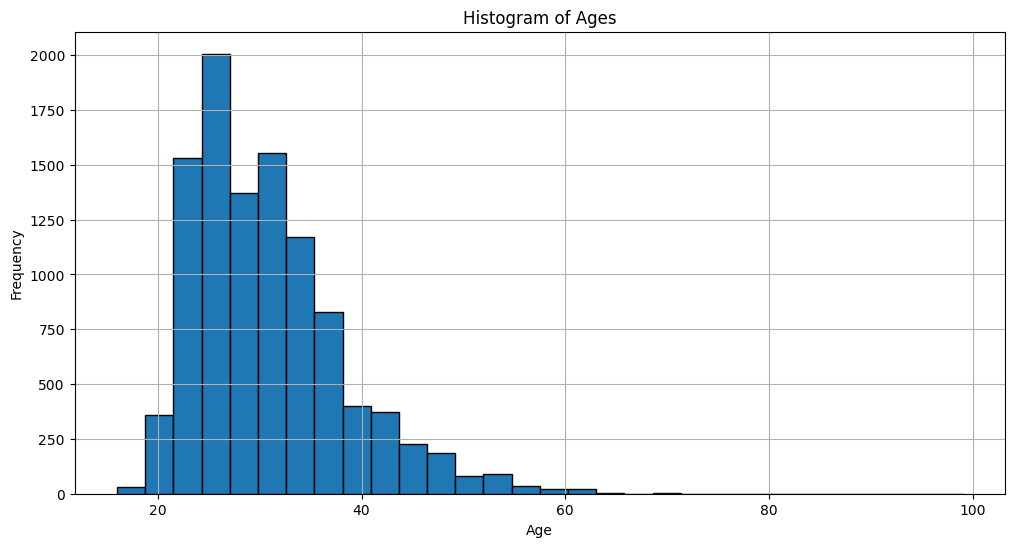

In [70]:
# your code goes here
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


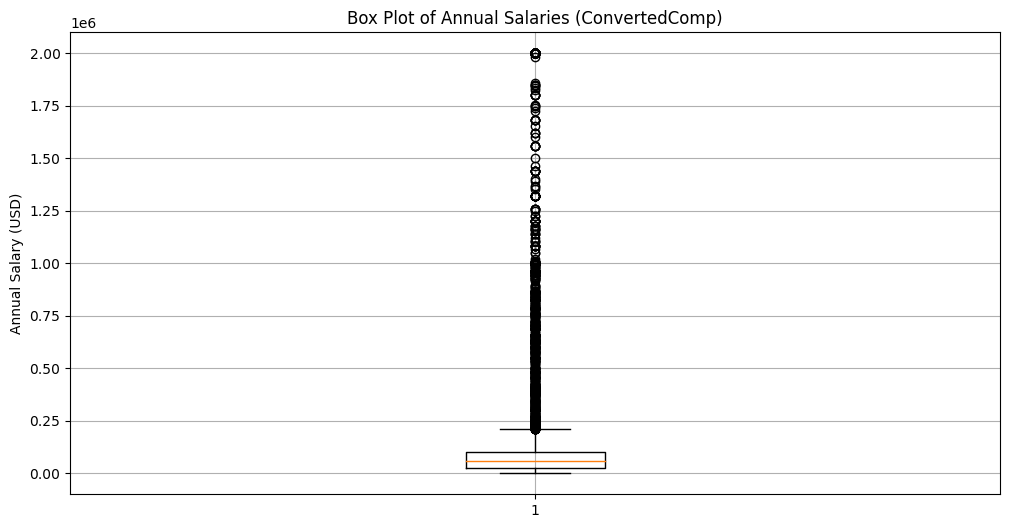

In [71]:
# your code goes here
plt.figure(figsize=(12, 6))
plt.boxplot(data)
plt.title('Box Plot of Annual Salaries (ConvertedComp)')
plt.ylabel('Annual Salary (USD)')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [72]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print(f"Interquartile Range (IQR) for 'ConvertedComp': {IQR}")

Interquartile Range (IQR) for 'ConvertedComp': 73132.5


Find out the upper and lower bounds.


In [73]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bound: -82831.25
Upper bound: 209698.75


Identify how many outliers are there in the `ConvertedComp` column.


In [74]:
# your code goes here
outliers = data[(data < lower_bound) | (data > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Number of outliers in 'ConvertedComp': {num_outliers}")

Number of outliers in 'ConvertedComp': 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [76]:
# your code goes here
data = df.dropna(subset = 'ConvertedComp')
df_no_outliers = data[(data['ConvertedComp'] >= lower_bound) & (data['ConvertedComp'] <= upper_bound)]

# Check the shape of the new DataFrame
print(f"Shape of the DataFrame after removing outliers: {df_no_outliers.shape}")

Shape of the DataFrame after removing outliers: (9638, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [78]:
# your code goes here
df_clean = df.dropna(subset=['Age'])
numeric_df = df_clean.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
age_correlation = correlation_matrix['Age']
print("Correlation between 'Age' and all other numerical columns:")
print(age_correlation)

Correlation between 'Age' and all other numerical columns:
Respondent       0.000317
CompTotal        0.007073
ConvertedComp    0.105921
WorkWeekHrs      0.031135
CodeRevHrs      -0.016658
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
